![CRISP_DM](../reports/figures/CRISP_DM.png)

# Imports for the notebook

In [1]:
import pandas as pd
import numpy as np
import git
import os
import plotly.express as px

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

# Logic to load the data from github

In [2]:
#run the below cell to checkout COVID data and if already done pull it to latest data.
git_dir='../data/raw/COVID-19'
if os.path.isdir(git_dir) == False:
    git.Git("../data/raw/").clone("https://github.com/CSSEGISandData/COVID-19.git")
else:
    print("Folder already exists no need to clone. Just a git pull should do the job")

print('Pulling the data now.....')

g = git.cmd.Git(git_dir)
g.pull()
    

Folder already exists no need to clone. Just a git pull should do the job
Pulling the data now.....


'Updating 14ead6c0..d92b2460\nFast-forward\n csse_covid_19_data/README.md | 2 +-\n 1 file changed, 1 insertion(+), 1 deletion(-)'

In [3]:
#we concentrate on time_series_covid19_confirmed_global.csv file for this project. 
#Lets have alook at the file
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [4]:
#We see that the columns Lat and Long is not necessary for us. So we can drop it and also rename column names with simple names. 
pd_raw=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_raw=pd_raw.drop(['Lat', 'Long'], axis=1)
pd_raw.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


## Number of countries data available: 

In [5]:
print("Number of Countries available: ",len(pd_raw['country'].unique()))

Number of Countries available:  188


In [6]:
germany_df=pd_raw[pd_raw['country']=='Canada']['8/13/20'].sum(axis=0)
germany_df

123180

In [7]:
country_list=['Germany',
              'US',
              'Russia',
              'India',
              'Brazil',
             ] 

In [8]:
#we create new df with Data as column. 
time_idx=pd_raw.columns[2:]
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in time_idx] 
#create df
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [9]:
#add columns of each country
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['country']==each].iloc[:,2::].sum(axis=0))

In [10]:
df_plot.head()

,date,Germany,US,Russia,India,Brazil
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


<AxesSubplot:xlabel='date'>

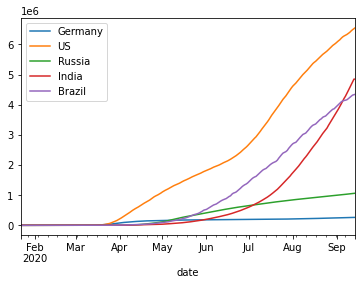

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

In [12]:
# the data is good enough lets compose it for all the countires 
#first get the time index
df_plot_full = pd.DataFrame({'date':time_idx})
df_plot_full.head()


#now add column of country and for countires with states just do the sum on axis 0
for each in pd_raw['country'].unique():
    df_plot_full[each]=np.array(pd_raw[pd_raw['country']==each].iloc[:,2::].sum(axis=0))

#set the index, stack the countires as columns and rename required columns    
df_plot_full=df_plot_full.set_index(['date']).stack(level=[0]).reset_index().rename(columns={'level_1':'country',
                                                                                            0:'confirmed'})

#write the data to a file for further processing. 
df_plot_full.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)
df_plot_full.head()


,date,country,confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Angola,0


# Now filter the data and calculate the doubling rate.

In [13]:
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal

In [14]:
def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function (data structure kept)

        parameters:
        ----------
        df_input : pandas.series
        column : str
        window : int
            used data points to calculate the filter result

        Returns:
        ----------
        df_result: pd.DataFrame
            the index of the df_input has to be preserved in result
    '''

    degree=1
    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate

        Parameters:
        ----------
        in_array : pandas.series

        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

def rolling_reg(df_input,col='confirmed'):
    ''' Rolling Regression to approximate the doubling time'

        Parameters:
        ----------
        df_input: pd.DataFrame
        col: str
            defines the used column
        Returns:
        ----------
        result: pd.DataFrame
    '''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)



    return result

def calc_filtered_data(df_input,filter_on='confirmed'):
    '''  Calculate savgol filter and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'

    df_output=df_input.copy() # we need a copy here otherwise the filter_on column will be overwritten


    pd_filtered_result=df_output[['country',filter_on]].groupby(['country']).apply(savgol_filter)
    #print('--+++ after group by apply')

    df_output=pd.merge(df_output,pd_filtered_result[[str(filter_on+'_filtered')]],left_index=True,right_index=True,how='left')
    return df_output.copy()


def calc_doubling_rate(df_input,filter_on='confirmed'):
    ''' Calculate approximated doubling rate and return merged data frame

        Parameters:
        ----------
        df_input: pd.DataFrame
        filter_on: str
            defines the used column
        Returns:
        ----------
        df_output: pd.DataFrame
            the result will be joined as a new column on the input data frame
    '''

    must_contain=set(['country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_1':'index'})

    #we do the merge on the index of our big table and on the index column after groupby
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output

In [15]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).copy()
pd_JH_data.head()
pd_result_larg=calc_filtered_data(pd_JH_data)
pd_result_larg=calc_doubling_rate(pd_result_larg)
pd_result_larg=calc_doubling_rate(pd_result_larg,'confirmed_filtered')

In [16]:
pd_result_larg.head()

,date,country,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR
0,2020-01-22,Afghanistan,0,0.0,NaN,NaN
28440,2020-01-22,Namibia,0,0.0,NaN,NaN
28677,2020-01-22,Nepal,0,-0.2,NaN,NaN
28914,2020-01-22,Netherlands,0,0.0,NaN,NaN
29151,2020-01-22,New Zealand,0,0.0,NaN,NaN


In [17]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)
print(pd_result_larg[pd_result_larg['country']=='Germany'].tail())

            date  country  confirmed  confirmed_filtered  confirmed_DR  \
15874 2020-09-10  Germany     258149            258018.2    160.722431   
15875 2020-09-11  Germany     259735            259374.2    156.332930   
15876 2020-09-12  Germany     260817            260732.0    194.577961   
15877 2020-09-13  Germany     261737            261946.8    260.502498   
15878 2020-09-14  Germany     263222            263161.6    217.817325   

       confirmed_filtered_DR  
15874             168.789051  
15875             184.661656  
15876             191.152480  
15877             202.662158  
15878             215.629569  


In [18]:
pd_result_larg_copy=pd_result_larg.copy()
pd_result_larg_copy=pd_result_larg_copy.fillna(0)
num = pd_result_larg_copy._get_numeric_data()
num[num < 0] = 0
pd_result_larg_copy.head()

,date,country,confirmed,confirmed_filtered,confirmed_DR,confirmed_filtered_DR
0,2020-01-22,Afghanistan,0,0.0,0.0,0.0
28440,2020-01-22,Namibia,0,0.0,0.0,0.0
28677,2020-01-22,Nepal,0,0.0,0.0,0.0
28914,2020-01-22,Netherlands,0,0.0,0.0,0.0
29151,2020-01-22,New Zealand,0,0.0,0.0,0.0


In [19]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
print(os.getcwd())
df_input_large=pd.read_csv('../data/processed/COVID_final_set.csv',sep=';')

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

fig = go.Figure()

app = dash.Dash()
app.layout = html.Div(children=[
        html.Div([html.H1('''
      Dashboard for Visualizig Confirmed and Doubling rate



    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_input_large['country'].unique()],
        value=['US', 'Germany','Italy'], # which are pre-selected
        multi=True
    ),

    dcc.Markdown('''
        ## Select Timeline of confirmed COVID-19 cases or the approximated doubling time
        '''),


    dcc.Dropdown(
    id='doubling_time',
    options=[
        {'label': 'Timeline Confirmed ', 'value': 'confirmed'},
        {'label': 'Timeline Confirmed Filtered', 'value': 'confirmed_filtered'},
        {'label': 'Timeline Doubling Rate', 'value': 'confirmed_DR'},
        {'label': 'Timeline Doubling Rate Filtered', 'value': 'confirmed_filtered_DR'},
    ],
    value='confirmed',
    multi=False
    ),

    dcc.Graph(id='main_window_slope')
], style={'display': 'inline-block','width': '55%'}),
        html.Div(children=[html.H2(id='heading'),
                           dcc.Graph(id="graph2"),], style={'display': 'inline-block','width': '40%'})
    ])



@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value'),
    Input('doubling_time', 'value')])
def update_figure(country_list,show_doubling):
    
    


    if 'doubling_rate' in show_doubling:
        my_yaxis={'type':"log",
               'title':'Approximated doubling rate over 3 days (larger numbers are better #stayathome)'
              }
    else:
        my_yaxis={'type':"log",
                  'title':'Confirmed infected people (source johns hopkins csse, log-scale)'
              }


    traces = []
    for each in country_list:

        df_plot=df_input_large[df_input_large['country']==each]

        if show_doubling=='doubling_rate_filtered':
            df_plot=df_plot[['country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.mean).reset_index()
        else:
            df_plot=df_plot[['country','confirmed','confirmed_filtered','confirmed_DR','confirmed_filtered_DR','date']].groupby(['country','date']).agg(np.sum).reset_index()
       #print(show_doubling)


        traces.append(dict(x=df_plot.date,
                                y=df_plot[show_doubling],
                                mode='markers+lines',
                                opacity=0.9,
                                name=each
                        )
                )

    return go.Figure(
            data= traces,
            layout= dict (
                width=1280,
                height=720,

                xaxis={'title':'Timeline',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },

                yaxis=my_yaxis
        )
    )

@app.callback(Output('graph2', 'figure'), [Input('main_window_slope', 'hoverData'),Input('doubling_time', 'value')])
def disp_hover_data(hover_data,doubling_time):
    fig2=go.Figure()
    if type(hover_data) is dict:
        #print(hover_data)
        date=hover_data['points'][0]['x']
        df_test=pd_result_larg_copy.loc[pd_result_larg['date'] == date]
        df = px.data.gapminder().query("year == 2007")
        df = pd.merge(df, df_test, on='country')
        fig2 = px.scatter_geo(df, locations="iso_alpha",
                             size=doubling_time, # size of markers, "pop" is one of the columns of gapminder
                             )
    return fig2


@app.callback(Output('heading', 'children'), [Input('doubling_time', 'value')])
def disp_hover_data(doubling_time):
    if doubling_time=='confirmed':
        return "World map of confirmed cases."
    elif doubling_time=='confirmed_filtered':
        return "World map of confirmed cases filetered."
    elif doubling_time=='confirmed_DR':
        return "World map of doubling rate on confirmed cases."
    else:
        return "World map of doubling rate on confirmed cases filetered."
        


if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)


/home/vikas/Desktop/Data_science/ads_covis_19/notebooks
Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
